In [172]:
import json
import pandas as pd

dataset = pd.read_json('./dataset.json') ## pd.read_json 이용
print(dataset[:10])


                                             profile  \
0  {'persona-id': 'Pro_05349', 'persona': {'perso...   
1  {'persona-id': 'Pro_05349', 'persona': {'perso...   
2  {'persona-id': 'Pro_05349', 'persona': {'perso...   
3  {'persona-id': 'Pro_05349', 'persona': {'perso...   
4  {'persona-id': 'Pro_05349', 'persona': {'perso...   
5  {'persona-id': 'Pro_05349', 'persona': {'perso...   
6  {'persona-id': 'Pro_05349', 'persona': {'perso...   
7  {'persona-id': 'Pro_05397', 'persona': {'perso...   
8  {'persona-id': 'Pro_05368', 'persona': {'perso...   
9  {'persona-id': 'Pro_05397', 'persona': {'perso...   

                                                talk  
0  {'id': {'profile-id': 'Pro_05349', 'talk-id': ...  
1  {'id': {'profile-id': 'Pro_05349', 'talk-id': ...  
2  {'id': {'profile-id': 'Pro_05349', 'talk-id': ...  
3  {'id': {'profile-id': 'Pro_05349', 'talk-id': ...  
4  {'id': {'profile-id': 'Pro_05349', 'talk-id': ...  
5  {'id': {'profile-id': 'Pro_05349', 'talk-id': ... 

In [173]:
import torch
print(torch.cuda.is_available())
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

True


In [174]:
# 코드 -> 텍스트 매핑 생성
map_age_band = {'A01': '청소년', 'A02': '청년', 'A03': '중년', 'A04': '노년'}
map_gender = {'G01': '남성', 'G02': '여성'}

# 상황 매핑
map_situation = {
    "S01": "가족관계",
    "S02": "학업 및 진로",
    "S03": "학교폭력/따돌림",
    "S04": "대인관계",
    "S05": "연애,결혼,출산",
    "S06": "진로,취업,직장",
    "S07": "대인관계(부부, 자녀)",
    "S08": "재정,은퇴,노후준비",
    "S09": "건강",
    "S10": "직장, 업무 스트레스",
    "S11": "건강,죽음",
    "S12": "대인관계(노년)",
    "S13": "재정"
}

# 질병 매핑
map_disease = {
    "D01": "만성질환 유",
    "D02": "만성질환 무"
}

# 감정 매핑
map_emotion = {
    "E10": "분노",
    "E20": "슬픔",
    "E30": "불안",
    "E40": "상처",
    "E50": "당황",
    "E60": "기쁨",
    # "E10": "분노",
    # "E11": "툴툴대는",
    # "E12": "좌절한",
    # "E13": "짜증내는",
    # "E14": "방어적인",
    # "E15": "악의적인",
    # "E16": "안달하는",
    # "E17": "구역질 나는",
    # "E18": "노여워하는",
    # "E19": "성가신",
    # "E20": "슬픔",
    # "E21": "실망한",
    # "E22": "비통한",
    # "E23": "후회되는",
    # "E24": "우울한",
    # "E25": "마비된",
    # "E26": "염세적인",
    # "E27": "눈물이 나는",
    # "E28": "낙담한",
    # "E29": "환멸을 느끼는",
    # "E30": "불안",
    # "E31": "두려운",
    # "E32": "스트레스 받는",
    # "E33": "취약한",
    # "E34": "혼란스러운",
    # "E35": "당혹스러운",
    # "E36": "회의적인",
    # "E37": "걱정스러운",
    # "E38": "조심스러운",
    # "E39": "초조한",
    # "E40": "상처",
    # "E41": "질투하는",
    # "E42": "배신당한",
    # "E43": "고립된",
    # "E44": "충격 받은",
    # "E45": "가난한, 불우한",
    # "E46": "희생된",
    # "E47": "억울한",
    # "E48": "괴로워하는",
    # "E49": "버려진",
    # "E50": "당황",
    # "E51": "고립된(당황한)",
    # "E52": "남의 시선을 의식하는",
    # "E53": "외로운",
    # "E54": "열등감",
    # "E55": "죄책감의",
    # "E56": "부끄러운",
    # "E57": "혐오스러운",
    # "E58": "한심한",
    # "E59": "혼란스러운(당황한)",
    # "E60": "기쁨",
    # "E61": "감사하는",
    # "E62": "신뢰하는",
    # "E63": "편안한",
    # "E64": "만족스러운",
    # "E65": "흥분",
    # "E66": "느긋",
    # "E67": "안도",
    # "E68": "신이 난",
    # "E69": "자신하는"
}

map_code = {
    'age_band': map_age_band,
    'gender': map_gender,
    'situation': map_situation,
    'disease': map_disease,
    'emotion': map_emotion
}

def decode(code_type, code):
     return map_code[code_type][code]

    

In [175]:
########################################
# 데이터 전처리
########################################
# 연령(profile.persona.human[0]) - [A01: 청소년, A02: 청년, A03: 중년, A04: 노년] 
# 성별(profile.persona.human[1]) - [G01: 남성, G02: 여성]

# 'human' 리스트에 'A01'이 포함된 레코드 필터링
filtered_dataset = dataset[
    dataset['profile'].apply(lambda x: 'A04' in x['persona']['human'])
]

flattened_profile = pd.json_normalize(filtered_dataset['profile'])
flattened_talk = pd.json_normalize(filtered_dataset['talk'])

combine = flattened_profile.join(flattened_talk)
df = pd.DataFrame(combine)

# 감정 레이블 간소화
df["emotion_type"] = df["emotion.type"].str[:2] + "0"
df['emotion_label'] = df['emotion_type'].astype('category').cat.codes
label_mapping = dict(enumerate(df['emotion_type'].astype('category').cat.categories))


In [176]:
# 청소년 데이터 셋 크기 확인
print(len(filtered_dataset))

# 감정 분포 확인
print(df['emotion_label'].value_counts())  # 클래스 분포 확인['content.HS01', 'content.HS02']]
print(df[['content.HS01', 'content.HS02']].sample(10), df['emotion_type'])

14587
emotion_label
3    2798
0    2715
4    2681
1    2540
2    2484
5    1369
Name: count, dtype: int64
                                            content.HS01  \
10652                            회사를 그만둔지 오래되니 점점 대화가 안돼   
10486                                 노년기 이혼한 친구가 다녀갔어.　   
7394            오늘 꿈자리가 사납더니 기분도 좋지 않아. 꼭 무슨 일이 일어날것 같아.   
1039                            부모님이 살아계신 친구들을 보면 질투가 나.   
11309  아들이 조금만 과하게 이야기하면 무시당하는 것 같고 내가 잘못 키웠나 하는 생각이 들어.   
5380                    남편이 나만 두고 먼저 세상을 떠나서 너무 외롭고 우울해.   
8427                           손주를 보다 손을 데인 친구의 전화를 받았어.   
1636                    내가 돈이 없어서 자식들에게 짐이 되는 것이 너무 우울해.   
4730                      며느리가 자기 전에 항상 관절염에 좋은 온찜질을 해줘.   
7551                        친구가 요즘 갑자기 날 멀리하는데 너무 혼란스러워.   

                                       content.HS02  
10652                      남편과도 그렇고 전 직장 동료를 만나도 그래  
10486       그렇게 바라던 이혼이었는데 경제적 뒷받침이 되지 않아 힘이 드는가봐.　  
7394                 오늘은 걱정되서 약속을 취소하고 집안에 있을 생각이야.  
1039             

In [186]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 1. 데이터 로드 및 전처리
class EmotionDataset(Dataset):
    def __init__(self, data, tokenizer, max_len):
        self.data = data
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        row = self.data.iloc[index]
        text = " ".join([str(row[col]) for col in ['content.HS01', 'content.HS02'] if pd.notna(row[col])])
        label = row['emotion_label']

        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# 2. 모델 및 토크나이저 로드
from transformers import AutoTokenizer, RobertaForSequenceClassification

MODEL_NAME = "klue/roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)

data_train, data_val = train_test_split(df, test_size=0.2, random_state=42)

# 데이터셋 생성
MAX_LEN = 128
train_dataset = EmotionDataset(data_train, tokenizer, MAX_LEN)
val_dataset = EmotionDataset(data_val, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# 3. 모델 초기화
model = RobertaForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=df['emotion_label'].nunique()
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 4. 손실 함수 및 옵티마이저 설정
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(df['emotion_label']), 
    y=df['emotion_label']
)
weights = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = torch.nn.CrossEntropyLoss(weight=weights)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [187]:
import numpy as np
sample_text = f"""{df['content.HS01'][0]} {df['content.HS02'][0]}"""
print("Original Text:", sample_text)

sample_data = tokenizer(sample_text)
print("Tokenized IDs:", ['input_ids'])

attention_ratio = sum(np.array(sample_data['attention_mask'])) / len(sample_data['attention_mask'])
print("Attention Mask Utilization:", attention_ratio)

Original Text: 그동안 담배를 너무 많이 피웠나 봐. 이제 와서 내가 모은 돈을 보니 너무 후회가 돼. 담배 살 돈을 아꼈다면 나는 지금 얼마를 더 모았을까? 그런 생각이 들어.
Tokenized IDs: ['input_ids']
Attention Mask Utilization: 1.0


In [188]:
# 5. 학습 루프
from transformers import get_scheduler

num_epochs = 3
num_training_steps = len(train_loader) * num_epochs
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)

def train_epoch(model, data_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for batch in data_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        if lr_scheduler:
            lr_scheduler.step()

        total_loss += loss.item()

    return total_loss / len(data_loader)

def eval_model(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            preds = torch.argmax(outputs.logits, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return total_loss / len(data_loader), classification_report(true_labels, predictions)


In [189]:
train_losses = []
val_losses = []

# 6. 학습 및 평가 실행
EPOCHS = 3
for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_report = eval_model(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Train Loss: {train_loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    print(val_report)



Epoch 1/3
Train Loss: 1.2731
Validation Loss: 1.1351
              precision    recall  f1-score   support

           0       0.59      0.51      0.54       521
           1       0.74      0.46      0.57       531
           2       0.64      0.57      0.60       516
           3       0.47      0.56      0.51       552
           4       0.51      0.67      0.58       549
           5       0.78      0.94      0.85       249

    accuracy                           0.59      2918
   macro avg       0.62      0.62      0.61      2918
weighted avg       0.60      0.59      0.58      2918

Epoch 2/3
Train Loss: 0.9893
Validation Loss: 1.0989
              precision    recall  f1-score   support

           0       0.56      0.59      0.57       521
           1       0.63      0.57      0.60       531
           2       0.63      0.60      0.61       516
           3       0.47      0.60      0.53       552
           4       0.66      0.53      0.59       549
           5       0.87   

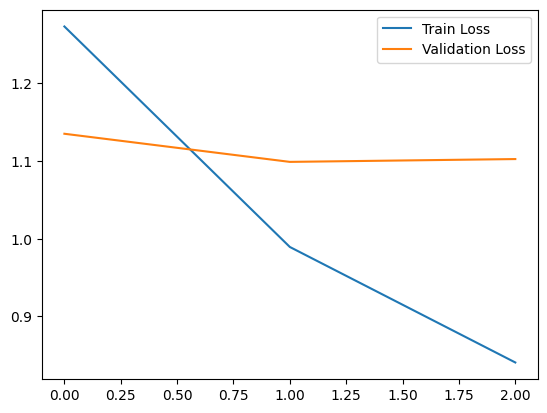

In [190]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend()
plt.show()

In [191]:

# 문장 예측 함수 및 레이블 디코딩 추가
def predict_emotion(model, tokenizer, text, label_mapping, max_len=128):
    model.eval()
    inputs = tokenizer(
        text,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors="pt"
    )
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        print(outputs, logits, torch.argmax(logits, dim=1).cpu().item())
        predicted_label = torch.argmax(logits, dim=1).cpu().item()

    decoded_label = label_mapping[predicted_label]
    return decoded_label



In [205]:

# 예제 사용
example_text = "하늘에서 내리는 눈은 마치 솜사탕처럼 쓰레기 같아 보인다."
result = predict_emotion(model, tokenizer, example_text, label_mapping)

print(label_mapping)
print(f"Input: {example_text}\nPredicted Emotion: { decode('emotion', result)}")



SequenceClassifierOutput(loss=None, logits=tensor([[ 1.8252,  0.6553, -0.7776,  0.6031,  0.7050, -3.0855]],
       device='cuda:0'), hidden_states=None, attentions=None) tensor([[ 1.8252,  0.6553, -0.7776,  0.6031,  0.7050, -3.0855]],
       device='cuda:0') 0
{0: 'E10', 1: 'E20', 2: 'E30', 3: 'E40', 4: 'E50', 5: 'E60'}
Input: 하늘에서 내리는 눈은 마치 솜사탕처럼 쓰레기 같아 보인다.
Predicted Emotion: 분노


In [ ]:
# 7. 모델 저장
torch.save(model.state_dict(), 'roberta_emotion_model.pth')


